In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator

2022-09-05 12:42:24.728933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# 1. Get log files

In [3]:
def get_tfb_file(directory):
    file_list = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            file_list.append(filepath)
    
    return file_list

In [4]:
log_multi_untargeted_xi_file = get_tfb_file("../logs/multi_untargeted/xi")
log_multi_untargeted_lr_file = get_tfb_file("../logs/multi_untargeted/lr")
log_multi_untargeted_box_file = get_tfb_file("../logs/multi_untargeted/box")

log_multi_targeted_xi_file = get_tfb_file("../logs/multi_targeted/xi")
log_multi_targeted_lr_file = get_tfb_file("../logs/multi_targeted/lr")
log_multi_targeted_box_file = get_tfb_file("../logs/multi_targeted/box")
log_multi_untargeted_aspect_file = get_tfb_file("../logs/multi_untargeted/aspect")

log_one_targeted_xi_file = get_tfb_file("../logs/one_targeted/xi")
log_one_targeted_lr_file = get_tfb_file("../logs/one_targeted/lr")
log_one_targeted_box_file = get_tfb_file("../logs/one_targeted/box")

log_multi_untargeted_mono_file = get_tfb_file("../logs/monochrome")

# 2. Get the data

In [5]:
def get_tfb_data(files, tag):
    data_list = []
    for f in files:
        data = []
        for e in summary_iterator(f):
            for v in e.summary.value:
                if v.tag == tag:
                    data.append(v.simple_value)
        data_list.append(data)
    
    return data_list

## Box Increase

In [6]:
log_multi_untargeted_xi_box = get_tfb_data(log_multi_untargeted_xi_file, "box increase")
log_multi_untargeted_lr_box = get_tfb_data(log_multi_untargeted_lr_file, "box increase")
log_multi_untargeted_box_box = get_tfb_data(log_multi_untargeted_box_file, "box increase")

log_multi_targeted_xi_box = get_tfb_data(log_multi_untargeted_xi_file, "box increase")
log_multi_targeted_lr_box = get_tfb_data(log_multi_untargeted_lr_file, "box increase")
log_multi_targeted_box_box = get_tfb_data(log_multi_untargeted_box_file, "box increase")

log_one_targeted_xi_box = get_tfb_data(log_one_targeted_xi_file, "box increase")
log_one_targeted_lr_box = get_tfb_data(log_one_targeted_lr_file, "box increase")
log_one_targeted_box_box = get_tfb_data(log_one_targeted_box_file, "box increase")

log_multi_untargeted_xi_box = get_tfb_data(log_multi_untargeted_xi_file, "box increase")
log_multi_untargeted_lr_box = get_tfb_data(log_multi_untargeted_lr_file, "box increase")
log_multi_untargeted_box_box = get_tfb_data(log_multi_untargeted_box_file, "box increase")

log_multi_untargeted_mono_box = get_tfb_data(log_multi_untargeted_mono_file, "box increase")
log_multi_untargeted_aspect_box = get_tfb_data(log_multi_untargeted_aspect_file, "box increase")

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


## Success Rate

In [7]:
log_multi_untargeted_xi_success = get_tfb_data(log_multi_untargeted_xi_file, "success rate")
log_multi_untargeted_lr_success = get_tfb_data(log_multi_untargeted_lr_file, "success rate")
log_multi_untargeted_box_success = get_tfb_data(log_multi_untargeted_box_file, "success rate")

log_multi_targeted_xi_success = get_tfb_data(log_multi_untargeted_xi_file, "success rate")
log_multi_targeted_lr_success = get_tfb_data(log_multi_untargeted_lr_file, "success rate")
log_multi_targeted_box_success = get_tfb_data(log_multi_untargeted_box_file, "success rate")

log_one_targeted_xi_success = get_tfb_data(log_one_targeted_xi_file, "success rate")
log_one_targeted_lr_success = get_tfb_data(log_one_targeted_lr_file, "success rate")
log_one_targeted_box_success = get_tfb_data(log_one_targeted_box_file, "success rate")

log_multi_untargeted_mono_success = get_tfb_data(log_multi_untargeted_mono_file, "success rate")
log_multi_untargeted_aspect_success = get_tfb_data(log_multi_untargeted_aspect_file, "success rate")

# 3. Plot the data

In [8]:
# sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

In [9]:
# !pip install latex

## Attack Strength

In [10]:
log_multi_untargeted_xi_file

['../logs/multi_untargeted/xi/8/20220904-022741/events.out.tfevents.1662260506.pop-os',
 '../logs/multi_untargeted/xi/2/20220904-054136/events.out.tfevents.1662272290.pop-os',
 '../logs/multi_untargeted/xi/4/20220904-040328/events.out.tfevents.1662266394.pop-os',
 '../logs/multi_untargeted/xi/10/20220904-005021/events.out.tfevents.1662254758.pop-os']

In [11]:
labels = [r'$\xi=8$', r'$\xi=2$', r'$\xi=4$', r'$\xi=10$']

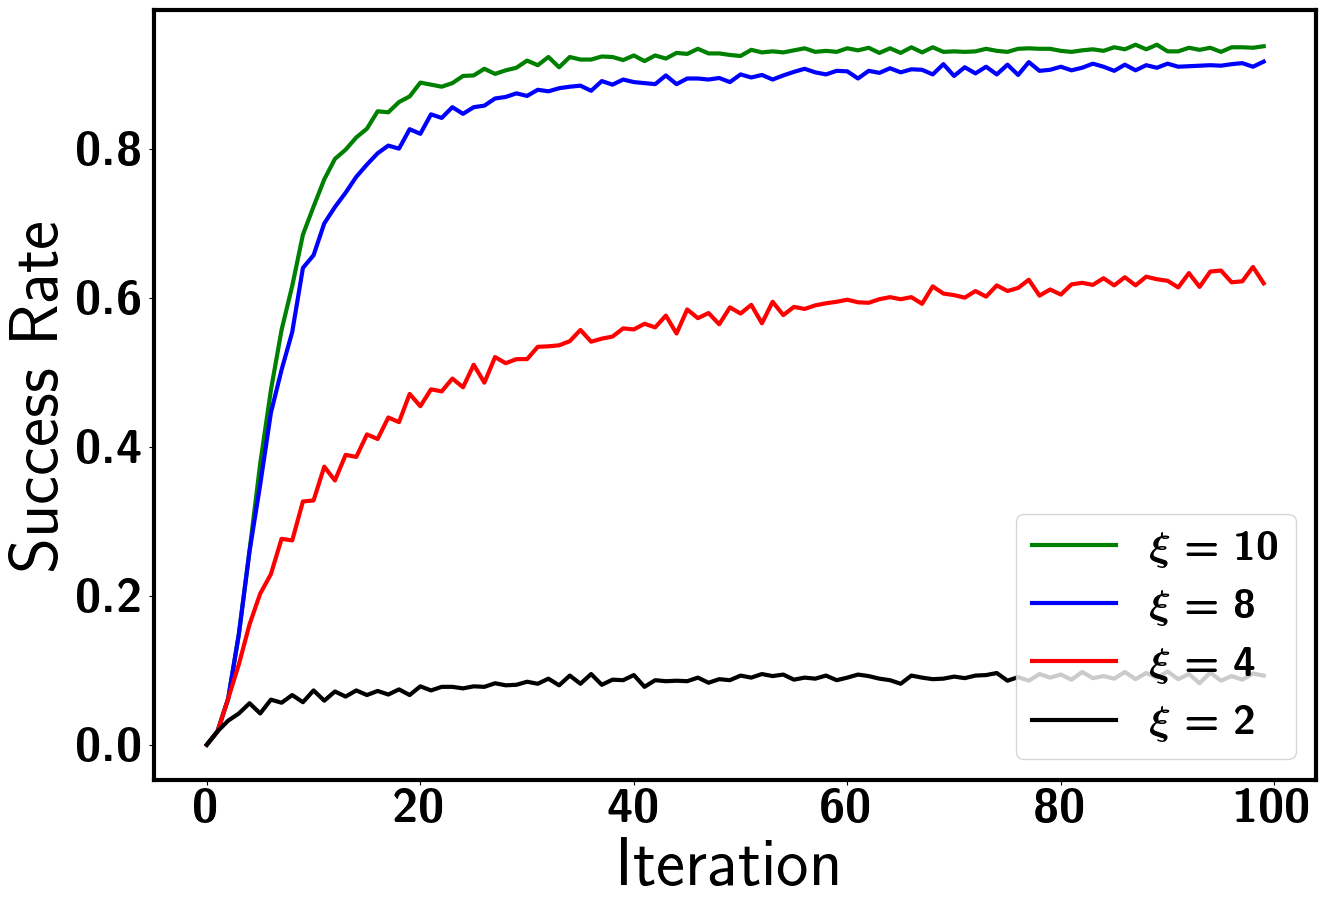

In [12]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Success Rate')


ax1.plot(log_multi_untargeted_xi_success[3], linewidth = 3, label = labels[3], color='green')
ax1.plot(log_multi_untargeted_xi_success[0], linewidth = 3, label = labels[0], color='blue')
ax1.plot(log_multi_untargeted_xi_success[2], linewidth = 3, label = labels[2], color='red')
ax1.plot(log_multi_untargeted_xi_success[1], linewidth = 3, label = labels[1], color='black')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [13]:
f.savefig("multi_untargeted_xi_success", bbox_inches='tight', pad_inches=0)

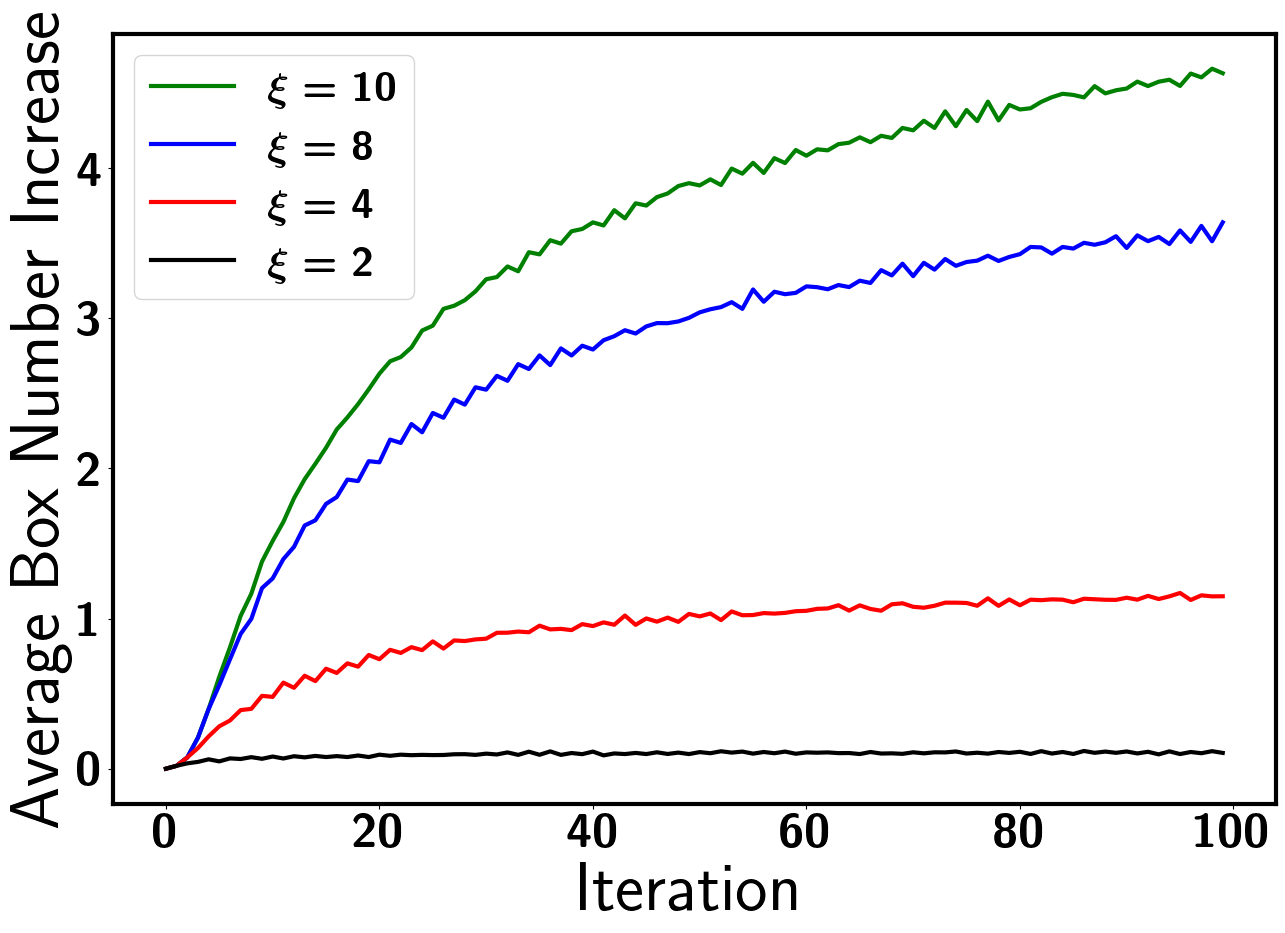

In [14]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)

# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Average Box Number Increase')

ax1.plot(log_multi_untargeted_xi_box[3], linewidth = 3, label = labels[3], color='green')
ax1.plot(log_multi_untargeted_xi_box[0], linewidth = 3, label = labels[0], color='blue')
ax1.plot(log_multi_untargeted_xi_box[2], linewidth = 3, label = labels[2], color='red')
ax1.plot(log_multi_untargeted_xi_box[1], linewidth = 3, label = labels[1], color='black')

ax1.legend(loc="upper left", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [15]:
f.savefig("multi_untargeted_xi_box", bbox_inches='tight', pad_inches=0)

## Learning Rate

In [16]:
log_multi_untargeted_lr_file

['../logs/multi_untargeted/lr/8/20220904-174440/events.out.tfevents.1662316509.pop-os',
 '../logs/multi_untargeted/lr/2/20220904-085814/events.out.tfevents.1662284123.pop-os',
 '../logs/multi_untargeted/lr/1/20220904-071952/events.out.tfevents.1662278192.pop-os',
 '../logs/multi_untargeted/lr/4/20220904-155330/events.out.tfevents.1662309778.pop-os']

In [17]:
labels = [r'$\alpha=8$', r'$\alpha=2$', r'$\alpha=1$', r'$\alpha=4$']

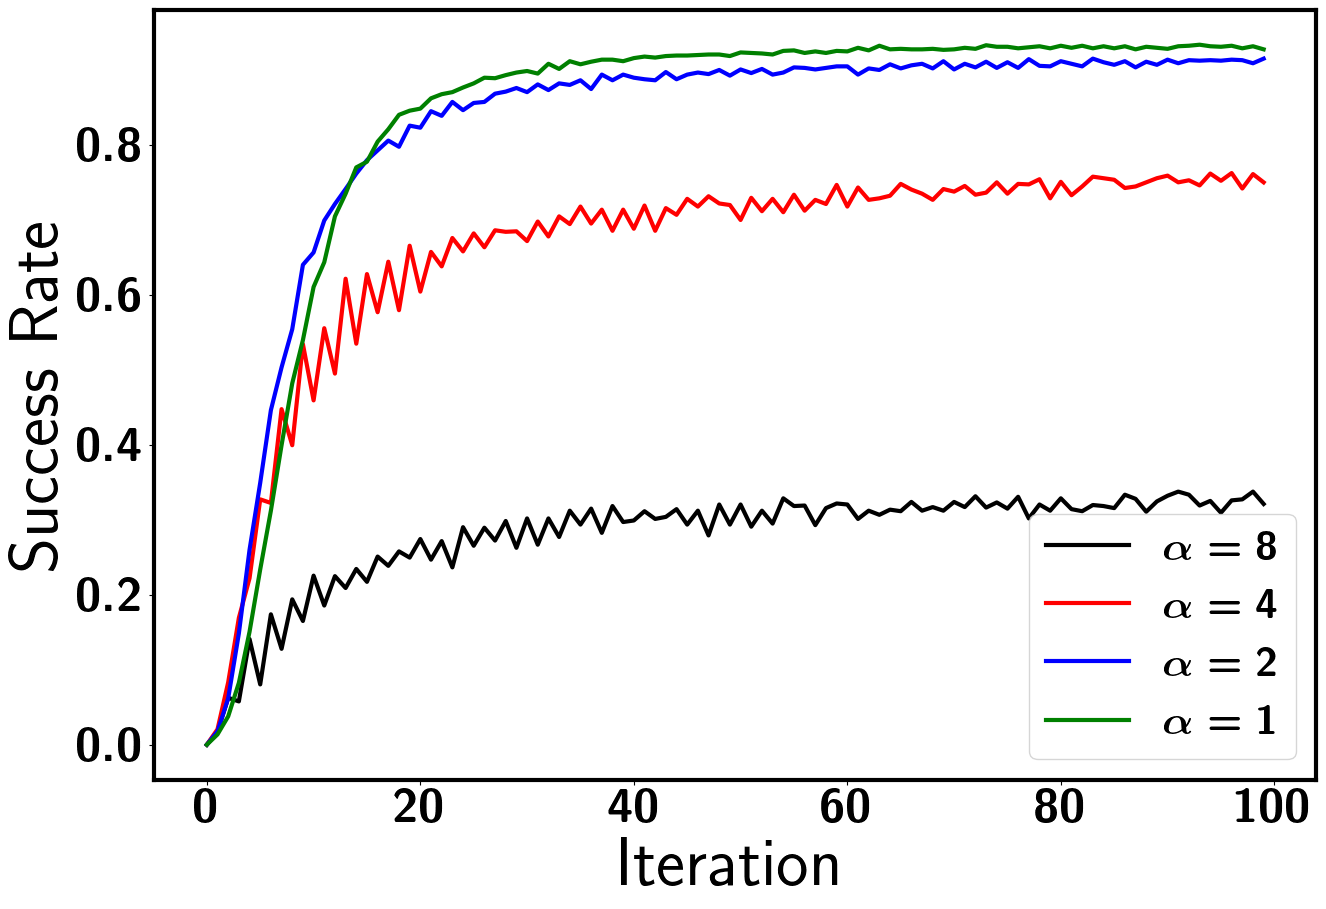

In [18]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Success Rate')


ax1.plot(log_multi_untargeted_lr_success[0], linewidth = 3, label = labels[0], color='black')
ax1.plot(log_multi_untargeted_lr_success[3], linewidth = 3, label = labels[3], color='red')
ax1.plot(log_multi_untargeted_lr_success[1], linewidth = 3, label = labels[1], color='blue')
ax1.plot(log_multi_untargeted_lr_success[2], linewidth = 3, label = labels[2], color='green')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [19]:
f.savefig("multi_untargeted_lr_success", bbox_inches='tight', pad_inches=0)

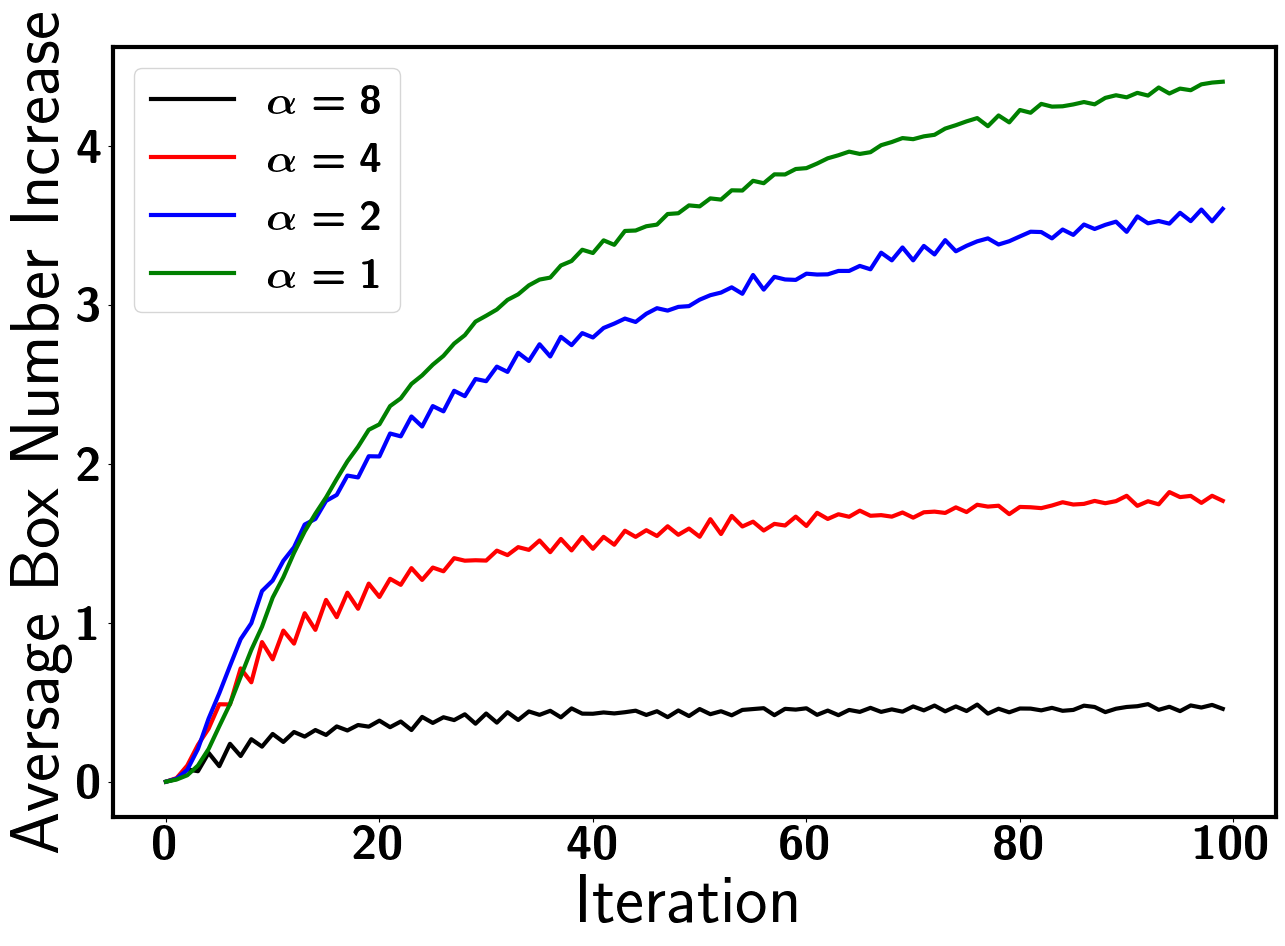

In [20]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Aversage Box Number Increase')


ax1.plot(log_multi_untargeted_lr_box[0], linewidth = 3, label = labels[0], color='black')
ax1.plot(log_multi_untargeted_lr_box[3], linewidth = 3, label = labels[3], color='red')
ax1.plot(log_multi_untargeted_lr_box[1], linewidth = 3, label = labels[1], color='blue')
ax1.plot(log_multi_untargeted_lr_box[2], linewidth = 3, label = labels[2], color='green')

ax1.legend(loc="upper left", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [21]:
f.savefig("multi_untargeted_lr_box", bbox_inches='tight', pad_inches=0)

## Box Sizes

In [22]:
log_multi_untargeted_box_file

['../logs/multi_untargeted/box/16/20220904-232031/events.out.tfevents.1662336451.pop-os',
 '../logs/multi_untargeted/box/64/20220904-022741/events.out.tfevents.1662260506.pop-os',
 '../logs/multi_untargeted/box/128/20220904-194143/events.out.tfevents.1662323397.pop-os',
 '../logs/multi_untargeted/box/32/20220904-213140/events.out.tfevents.1662329928.pop-os']

In [23]:
labels = [r'16x16', r'64x64', r'128x128', r'32x32']

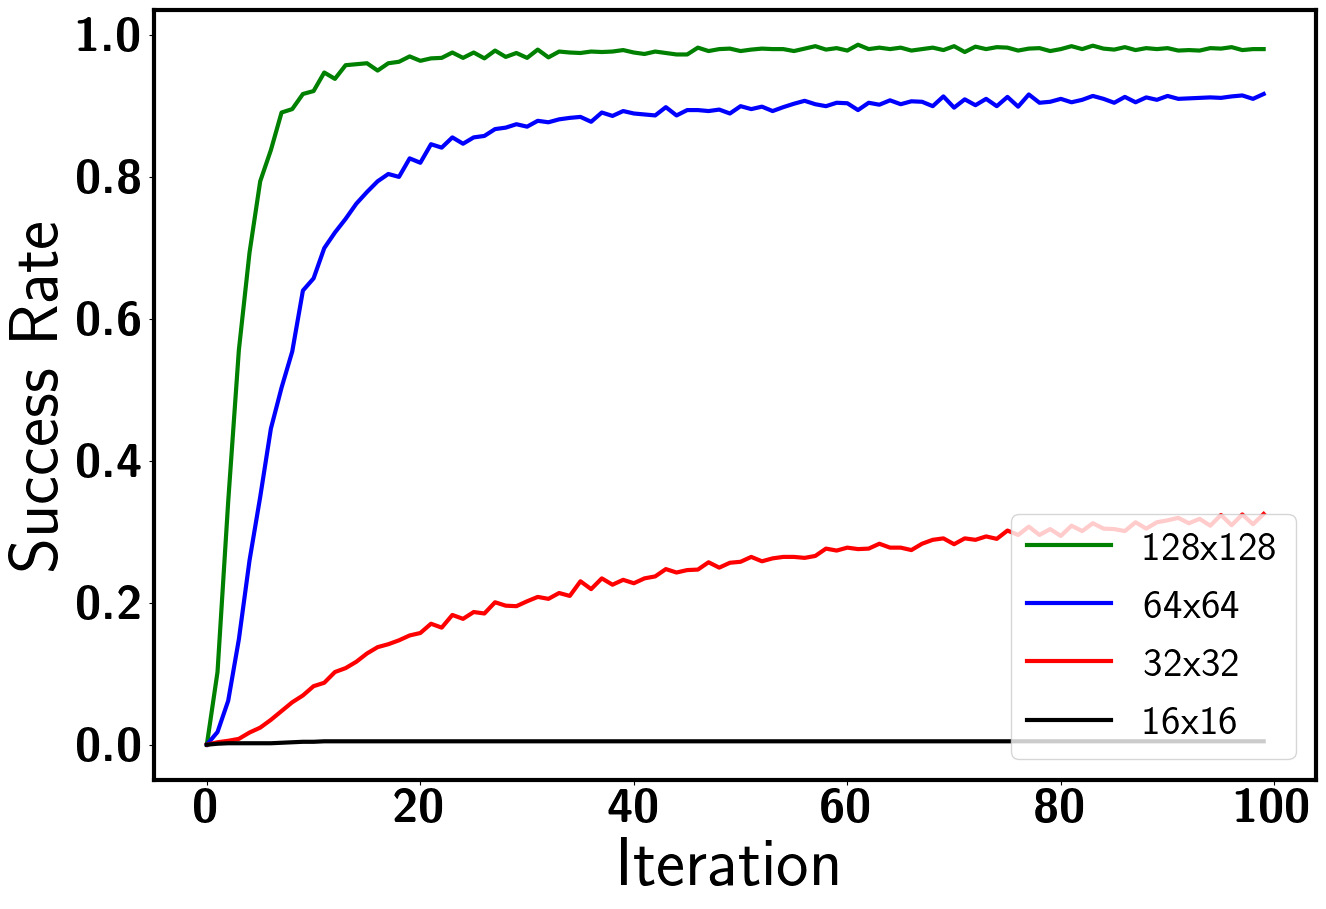

In [24]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Success Rate')


ax1.plot(log_multi_untargeted_box_success[2], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_box_success[1], linewidth = 3, label = labels[1], color='blue')
ax1.plot(log_multi_untargeted_box_success[3], linewidth = 3, label = labels[3], color='red')
ax1.plot(log_multi_untargeted_box_success[0], linewidth = 3, label = labels[0], color='black')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [25]:
f.savefig("multi_untargeted_box_success", bbox_inches='tight', pad_inches=0)

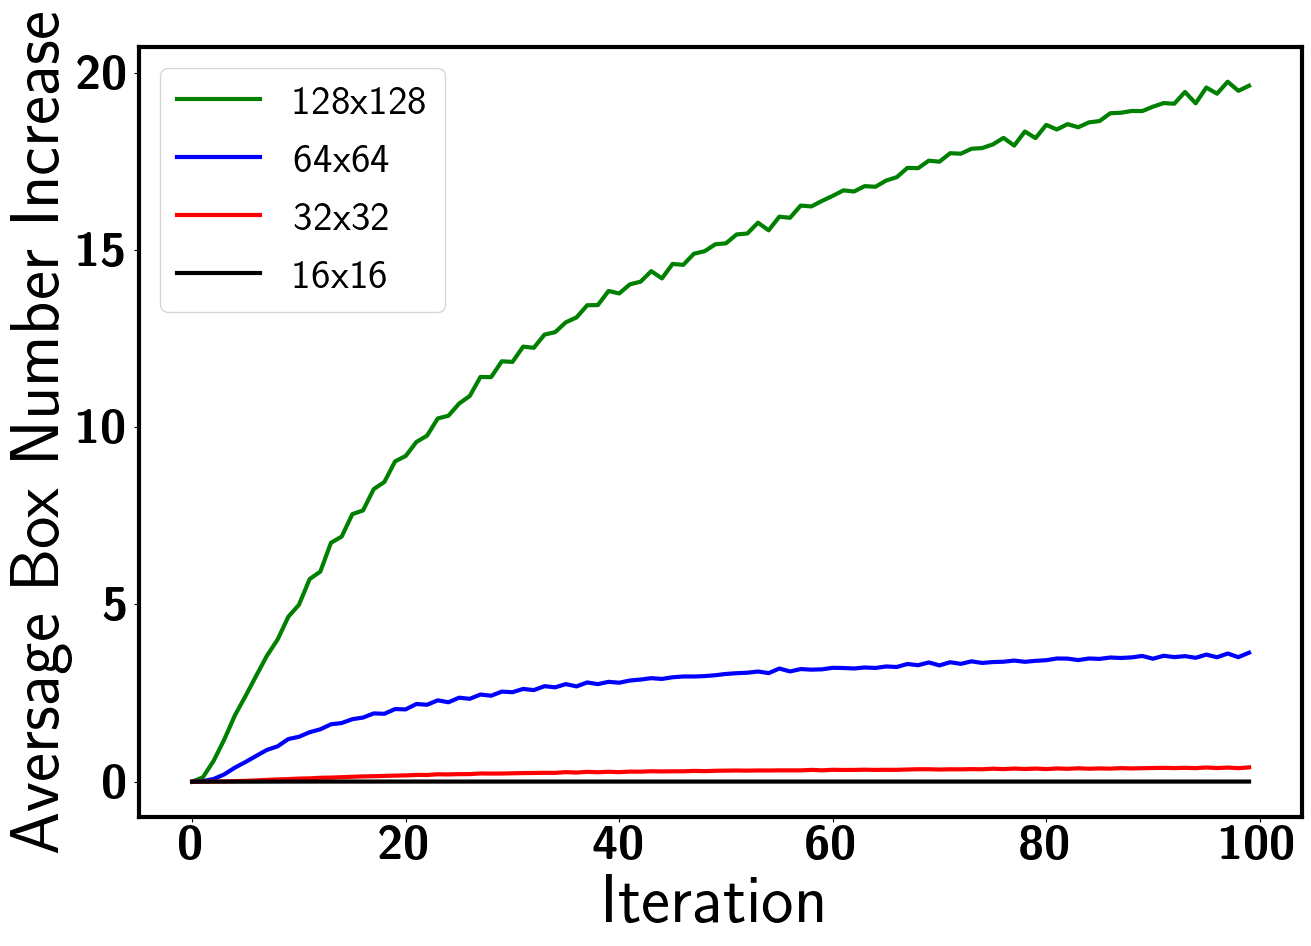

In [26]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Aversage Box Number Increase')


ax1.plot(log_multi_untargeted_box_box[2], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_box_box[1], linewidth = 3, label = labels[1], color='blue')
ax1.plot(log_multi_untargeted_box_box[3], linewidth = 3, label = labels[3], color='red')
ax1.plot(log_multi_untargeted_box_box[0], linewidth = 3, label = labels[0], color='black')

ax1.legend(loc="upper left", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [27]:
f.savefig("multi_untargeted_box_box", bbox_inches='tight', pad_inches=0)

## Monochrome

In [28]:
log_multi_untargeted_mono_file

['../logs/monochrome/R/20220903-194323/events.out.tfevents.1662236207.pop-os',
 '../logs/monochrome/RGB/20220903-175241/events.out.tfevents.1662230093.pop-os',
 '../logs/monochrome/G/20220903-212057/events.out.tfevents.1662241833.pop-os',
 '../logs/monochrome/B/20220903-225456/events.out.tfevents.1662247785.pop-os']

In [29]:
labels = [r'R', r'RGB', r'G', r'B']

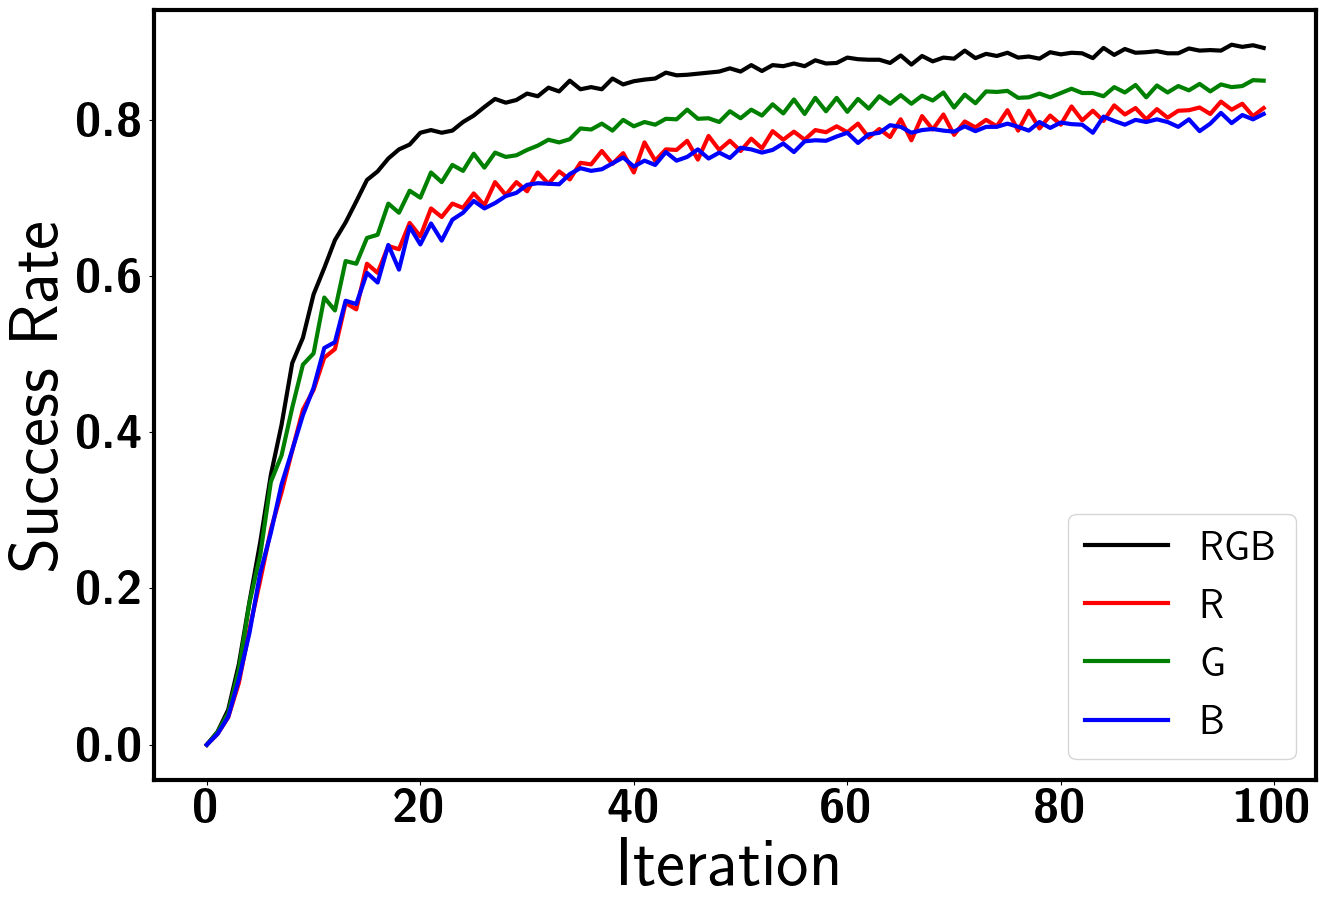

In [30]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Success Rate')


ax1.plot(log_multi_untargeted_mono_success[1], linewidth = 3, label = labels[1], color='black')
ax1.plot(log_multi_untargeted_mono_success[0], linewidth = 3, label = labels[0], color='red')
ax1.plot(log_multi_untargeted_mono_success[2], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_mono_success[3], linewidth = 3, label = labels[3], color='blue')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [31]:
f.savefig("multi_untargeted_mono_success", bbox_inches='tight', pad_inches=0)

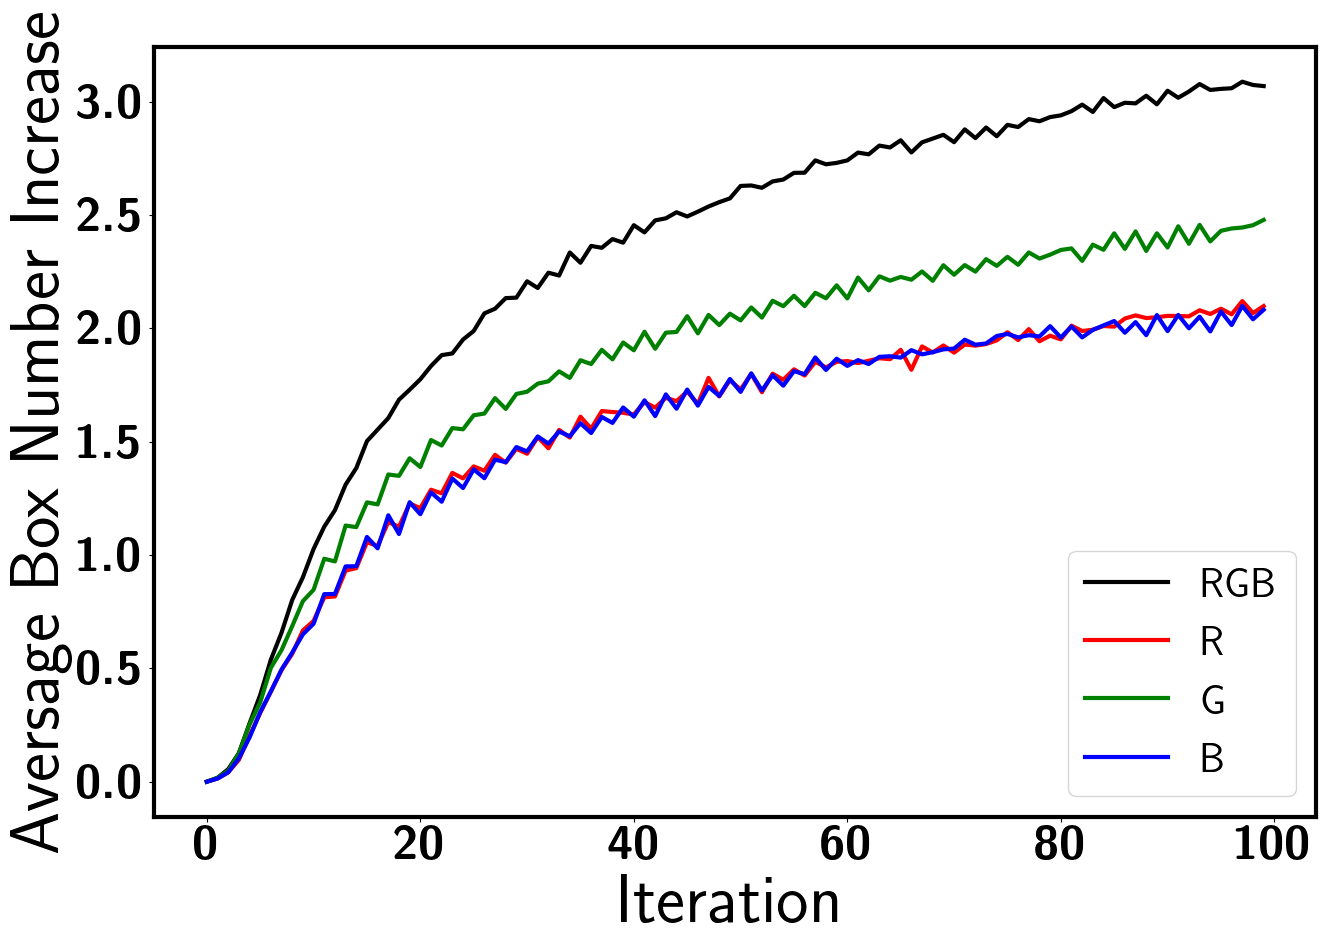

In [32]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Aversage Box Number Increase')


ax1.plot(log_multi_untargeted_mono_box[1], linewidth = 3, label = labels[1], color='black')
ax1.plot(log_multi_untargeted_mono_box[0], linewidth = 3, label = labels[0], color='red')
ax1.plot(log_multi_untargeted_mono_box[2], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_mono_box[3], linewidth = 3, label = labels[3], color='blue')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [33]:
f.savefig("multi_untargeted_mono_box", bbox_inches='tight', pad_inches=0)

## Aspect Ratio

In [34]:
log_multi_untargeted_aspect_file

['../logs/multi_untargeted/aspect/45/20220905-025811/events.out.tfevents.1662349771.pop-os',
 '../logs/multi_untargeted/aspect/37/20220905-045113/events.out.tfevents.1662356466.pop-os',
 '../logs/multi_untargeted/aspect/64/20220904-022741/events.out.tfevents.1662260506.pop-os',
 '../logs/multi_untargeted/aspect/90/20220905-083723/events.out.tfevents.1662369980.pop-os',
 '../logs/multi_untargeted/aspect/111/20220905-102802/events.out.tfevents.1662376766.pop-os',
 '../logs/multi_untargeted/aspect/52/20220905-010913/events.out.tfevents.1662342988.pop-os',
 '../logs/multi_untargeted/aspect/78/20220905-064249/events.out.tfevents.1662363341.pop-os']

In [35]:
labels = [r'1:1', r'1:1.5', r'1:2', r'1:3']

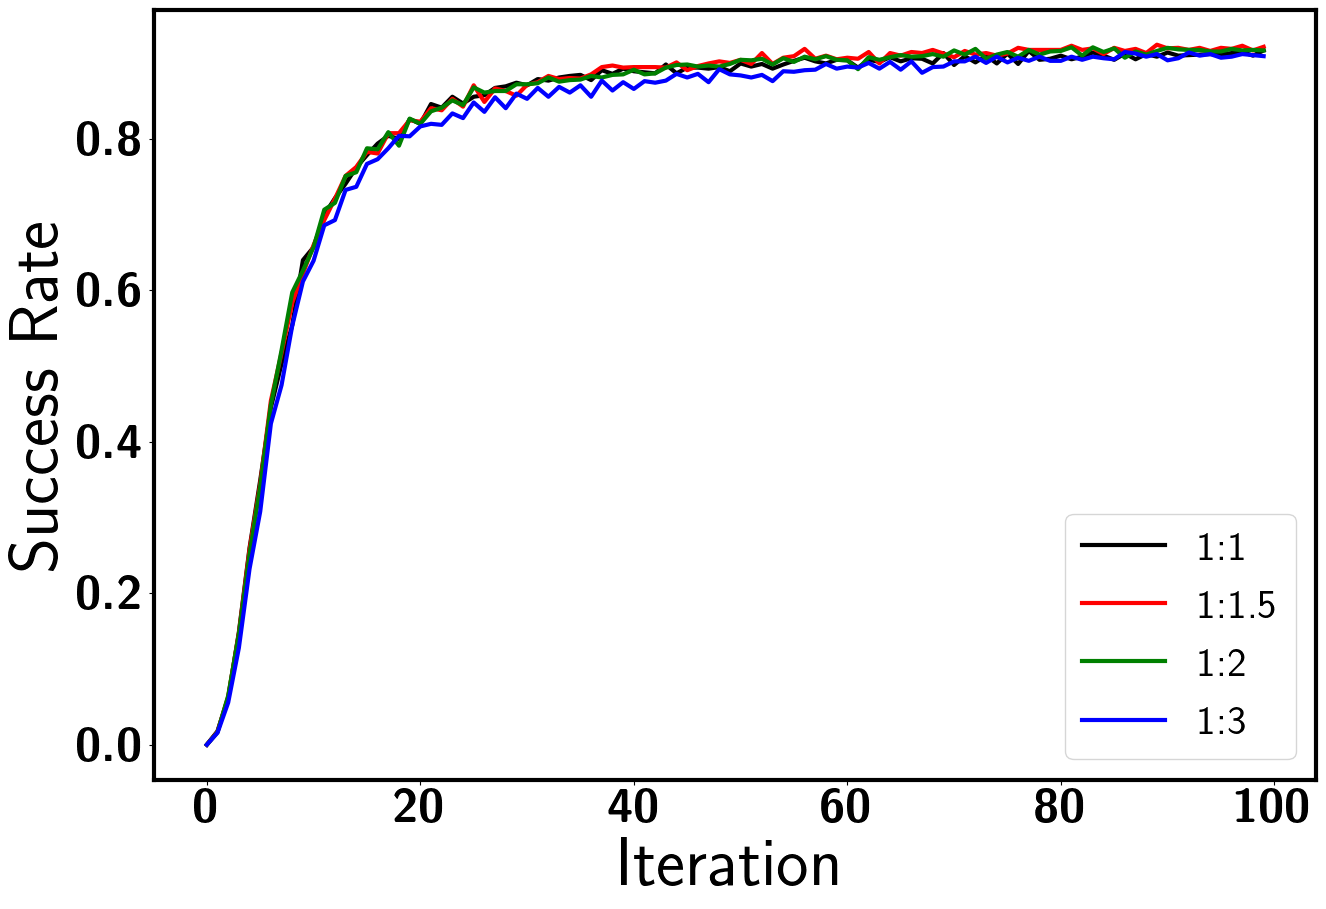

In [36]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Success Rate')


ax1.plot(log_multi_untargeted_aspect_success[2], linewidth = 3, label = labels[0], color='black')
ax1.plot(log_multi_untargeted_aspect_success[5], linewidth = 3, label = labels[1], color='red')
ax1.plot(log_multi_untargeted_aspect_success[0], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_aspect_success[1], linewidth = 3, label = labels[3], color='blue')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [37]:
f.savefig("multi_untargeted_apect_1_n_success", bbox_inches='tight', pad_inches=0)

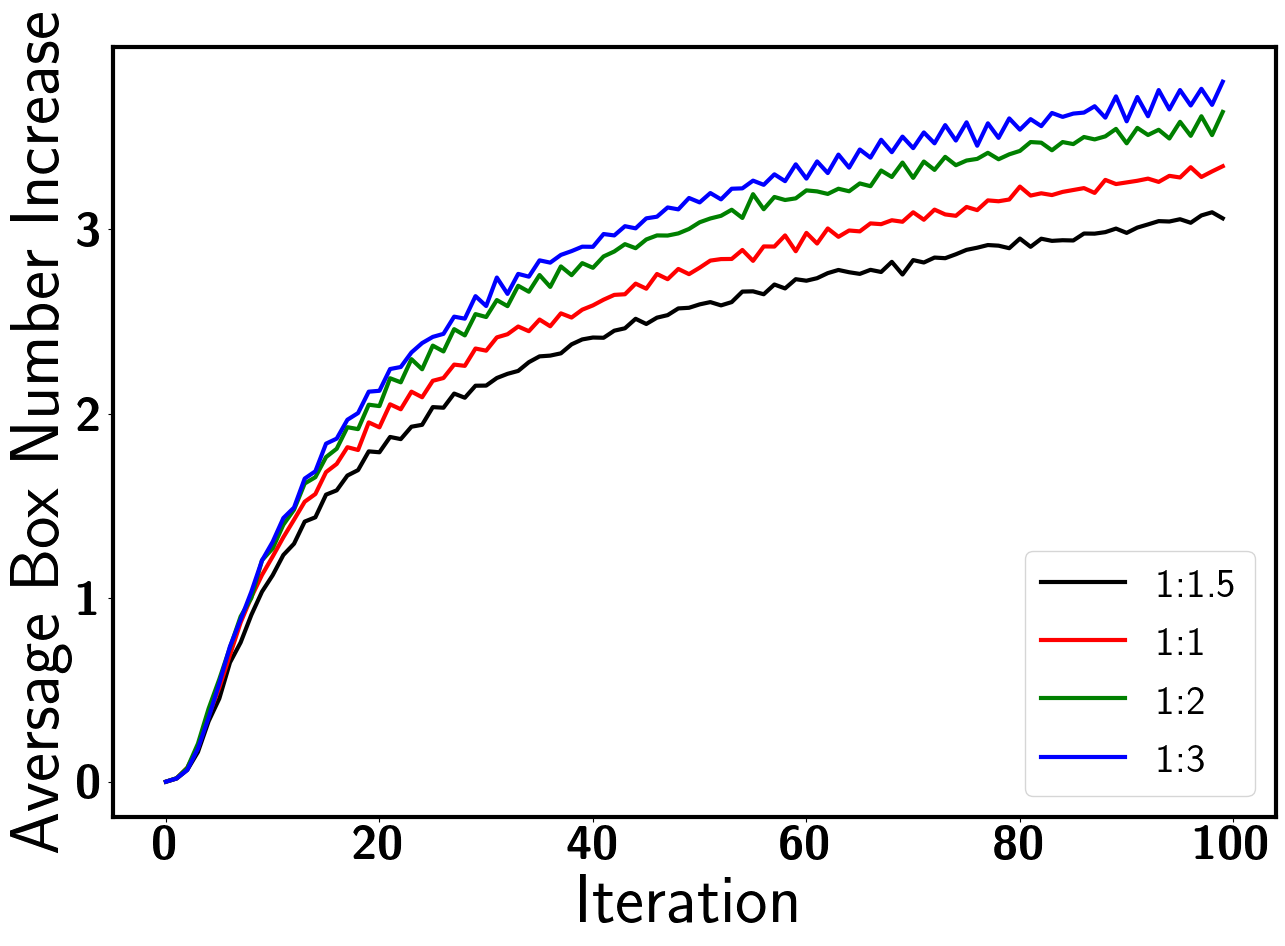

In [38]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Aversage Box Number Increase')


ax1.plot(log_multi_untargeted_aspect_box[1], linewidth = 3, label = labels[1], color='black')
ax1.plot(log_multi_untargeted_aspect_box[0], linewidth = 3, label = labels[0], color='red')
ax1.plot(log_multi_untargeted_aspect_box[2], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_aspect_box[3], linewidth = 3, label = labels[3], color='blue')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [39]:
f.savefig("multi_untargeted_aspect_1_n_box", bbox_inches='tight', pad_inches=0)

In [40]:
log_multi_untargeted_aspect_file

['../logs/multi_untargeted/aspect/45/20220905-025811/events.out.tfevents.1662349771.pop-os',
 '../logs/multi_untargeted/aspect/37/20220905-045113/events.out.tfevents.1662356466.pop-os',
 '../logs/multi_untargeted/aspect/64/20220904-022741/events.out.tfevents.1662260506.pop-os',
 '../logs/multi_untargeted/aspect/90/20220905-083723/events.out.tfevents.1662369980.pop-os',
 '../logs/multi_untargeted/aspect/111/20220905-102802/events.out.tfevents.1662376766.pop-os',
 '../logs/multi_untargeted/aspect/52/20220905-010913/events.out.tfevents.1662342988.pop-os',
 '../logs/multi_untargeted/aspect/78/20220905-064249/events.out.tfevents.1662363341.pop-os']

In [41]:
labels = [r'1:1', r'1.5:1', r'2:1', r'3:1']

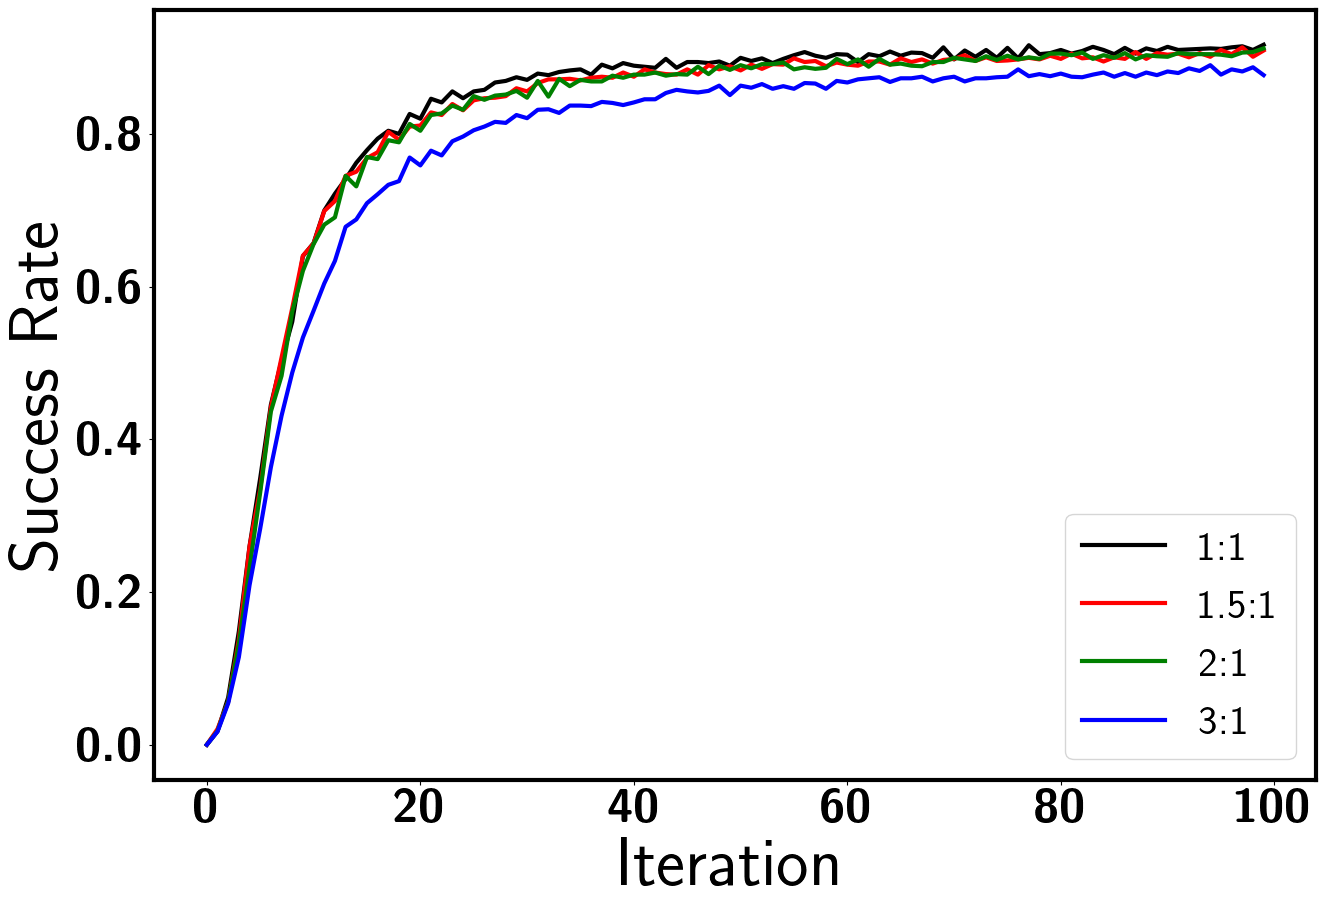

In [42]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Success Rate')


ax1.plot(log_multi_untargeted_aspect_success[2], linewidth = 3, label = labels[0], color='black')
ax1.plot(log_multi_untargeted_aspect_success[6], linewidth = 3, label = labels[1], color='red')
ax1.plot(log_multi_untargeted_aspect_success[3], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_aspect_success[4], linewidth = 3, label = labels[3], color='blue')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [43]:
f.savefig("multi_untargeted_aspect_n_1_success", bbox_inches='tight', pad_inches=0)

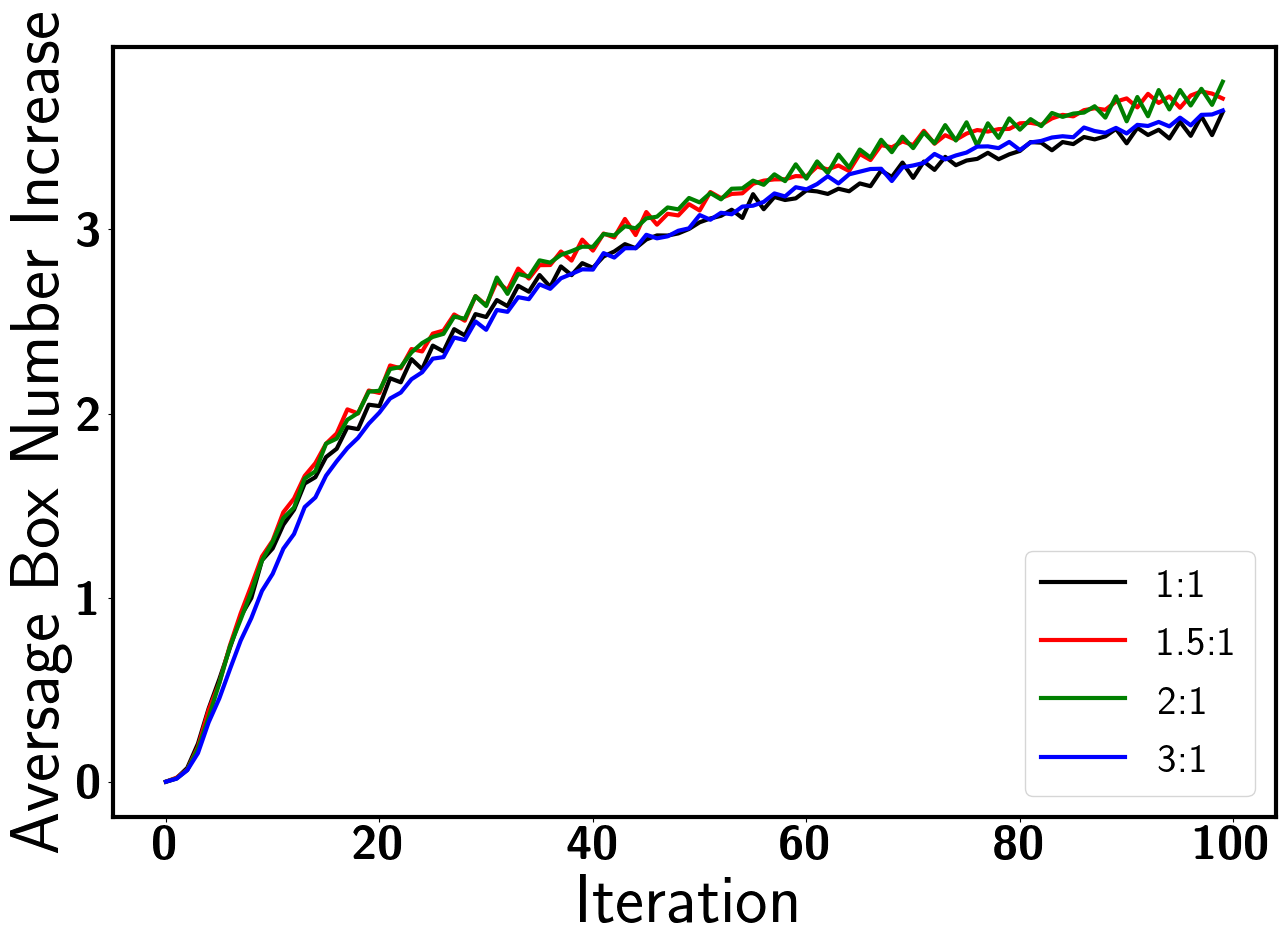

In [44]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)


# plt.subplot(1, 3, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Aversage Box Number Increase')


ax1.plot(log_multi_untargeted_aspect_box[2], linewidth = 3, label = labels[0], color='black')
ax1.plot(log_multi_untargeted_aspect_box[6], linewidth = 3, label = labels[1], color='red')
ax1.plot(log_multi_untargeted_aspect_box[3], linewidth = 3, label = labels[2], color='green')
ax1.plot(log_multi_untargeted_aspect_box[4], linewidth = 3, label = labels[3], color='blue')

ax1.legend(loc="lower right", prop={'size': 30})


# plt.subplot(1, 3, 2)

# plt.subplot(1, 3, 3)

plt.show()

In [45]:
f.savefig("multi_untargeted_aspect_n_1_box", bbox_inches='tight', pad_inches=0)